In [1]:
import nashpy as nash

In [5]:
import egttools as egt

from egttools.analytical.utils import (calculate_gradients, find_roots, check_replicator_stability_pairwise_games, )

In [6]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

This is a way to specify the interactions of two types. If A interacts with an- other A, it obtains a, and b if it interacts with B. Similarly, B obtains c from interactions with A and d from interactions with B. The payoffs are deter- mined by the fraction of interactions with a given type. Since we have only two types, the population state is fully determined by x = x1 = 1 − x2. The payoffsarethenπA =ax+b(1−x)andπB =cx+d(1−x).Thisleadstothe replicator equation
x ̇ = x ( 1 − x ) [ ( a − b − c + d ) x + b − d ] . ( 2 . 3 ) Apart from the trivial fixed points x = 0 and x = 1, the replicator equation
canhaveathirdfixedpointx∗ fora>candd>borfora<candd<b,
x∗ = d−b . (2.4)
2.2 The Replicator Dynamics 27
a−b−c+d
We can distinguish four generic cases [77], see Figure 2.1:

In [7]:
A = np.array([[3, 0], [5, 1]])
B = np.array([[3, 5], [0, 1]])

prisoners_dilemma = nash.Game(A, B)
prisoners_dilemma

Bi matrix game with payoff matrices:

Row player:
[[3 0]
 [5 1]]

Column player:
[[3 5]
 [0 1]]

In [16]:
trajectories = prisoners_dilemma.replicator_dynamics(y0 = [2/3, 1/3])

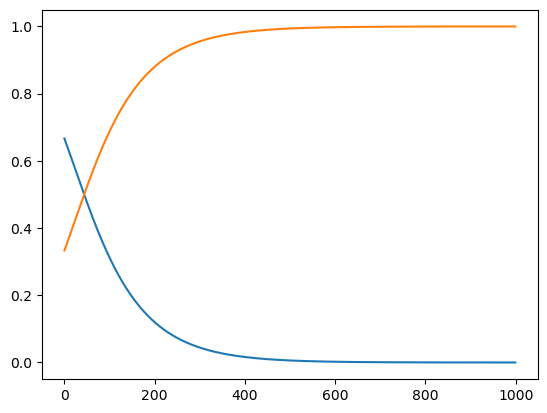

In [17]:
plt.plot(trajectories);

In [39]:
stability

[-1, 1]

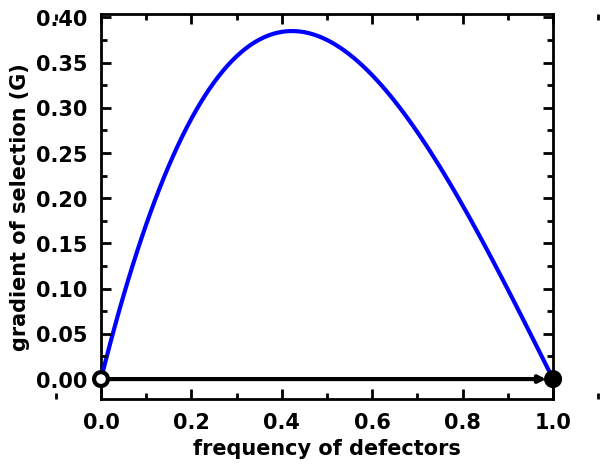

In [42]:
# Calculate gradient
payoffs = np.array([[1, 5], [0, 3]])

x = np.linspace(0, 1, num=101, dtype=np.float64)

gradient_function = lambda x: egt.analytical.replicator_equation(x, payoffs)

gradients = calculate_gradients(np.array((x, 1 - x)).T, gradient_function)

# Find roots and stability
roots = find_roots(gradient_function, nb_strategies=2, nb_initial_random_points=10, method="hybr")

stability = check_replicator_stability_pairwise_games(roots, payoffs)

# Plot the gradient
egt.plotting.plot_gradients(gradients[:, 0], xlabel="frequency of defectors", roots=roots, stability=stability);

# egt.plotting.plot_gradients(gradients[:, 1], xlabel="frequency of hawks", roots=roots, stability=stability);